In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

Attribute info:

age: Age of the patient

sex: Sex of the patient

cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps: Resting blood pressure (in mm Hg)

chol: Cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh: Maximum heart rate achieved

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

exng: Exercise induced angina ~ 1 = Yes, 0 = No

output: Target variable



In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Converting categorical variales from numeric format to string, for better understanding of the dataset

In [7]:
df1=df
df1['sex']=np.where(df1['sex']==1,'Male',df1['sex'])
df1['sex']=np.where(df1['sex']=='0','Female',df1['sex'])
df1.head()

age     sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    Male   3     145   233    1        0       150     0      2.3    0   
1   37    Male   2     130   250    0        1       187     0      3.5    0   
2   41  Female   1     130   204    0        0       172     0      1.4    2   
3   56    Male   1     120   236    0        1       178     0      0.8    2   
4   57  Female   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [8]:
df1['exng'] = df1['exng'].map({1:'yes',0:'no'})
df1['cp'] = df1['cp'].map({0:'typical angina',1:'Actual typical angina',2:'non-anginal pain',3:'asymptomatic'})
df1['fbs'] = df1['fbs'].map({1:'true',0:'false'})
df1['restecg'] = df1['restecg'].map({0:'normal',1:'having ST-T wave abnormality',2:'showing probable or definite left ventricular hypertrophy'})
df1['output'] = df1['output'].map({0:'less chance of heart attack',1:'more chance of heart attack'})

In [9]:
df1.head()

age     sex                     cp  trtbps  chol    fbs  \
0   63    Male           asymptomatic     145   233   true   
1   37    Male       non-anginal pain     130   250  false   
2   41  Female  Actual typical angina     130   204  false   
3   56    Male  Actual typical angina     120   236  false   
4   57  Female         typical angina     120   354  false   

                        restecg  thalachh exng  oldpeak  slp  caa  thall  \
0                        normal       150   no      2.3    0    0      1   
1  having ST-T wave abnormality       187   no      3.5    0    0      2   
2                        normal       172   no      1.4    2    0      2   
3  having ST-T wave abnormality       178   no      0.8    2    0      2   
4  having ST-T wave abnormality       163  yes      0.6    2    0      2   

                        output  
0  more chance of heart attack  
1  more chance of heart attack  
2  more chance of heart attack  
3  more chance of heart attack  
4  more chance of heart attack

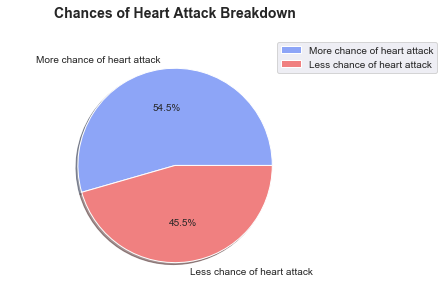

In [10]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
labels='More chance of heart attack','Less chance of heart attack'
sizes=list(df1['output'].value_counts())
colors=['#8da5f7','lightcoral']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Chances of Heart Attack Breakdown',y=1.0, pad=40,fontsize=14,fontweight='bold')
plt.legend(loc="right", bbox_to_anchor=(1.3, 1))
plt.show()

The output is balanced

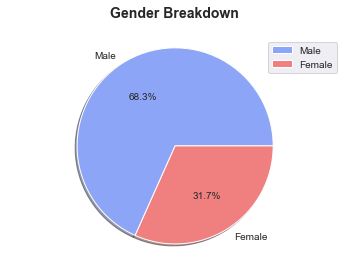

In [11]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
labels='Male','Female'
sizes=list(df1['sex'].value_counts())
colors=['#8da5f7','lightcoral']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('Gender Breakdown',y=1.0, pad=20,fontsize=14,fontweight='bold')
plt.axis('equal')
plt.legend()
plt.show()

68.3% of the Patients are Male

31.7% of the Patients are Female

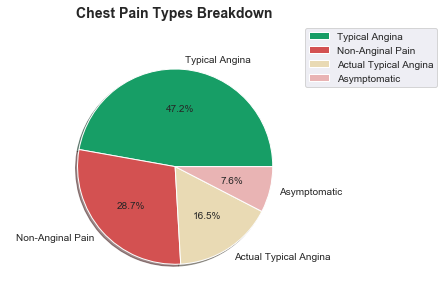

In [12]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
labels='Typical Angina','Non-Anginal Pain','Actual Typical Angina','Asymptomatic'
sizes=list(df1['cp'].value_counts())
colors=['#179E66', '#D35151', '#E9DAB4', '#E9B4B4']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Chest Pain Types Breakdown',y=1.0, pad=40,fontsize=14,fontweight='bold')
plt.legend(loc="right", bbox_to_anchor=(1.3, 1))
plt.show()

47.2% of the patients suffer from Typical Angina Chest Pain

28.7% of the patients suffer from Non-Anginal Chest Pain

16.5% of the patients suffer from Actual Typical Angina Chest Pain

7.6% of the patients are asymptomatic

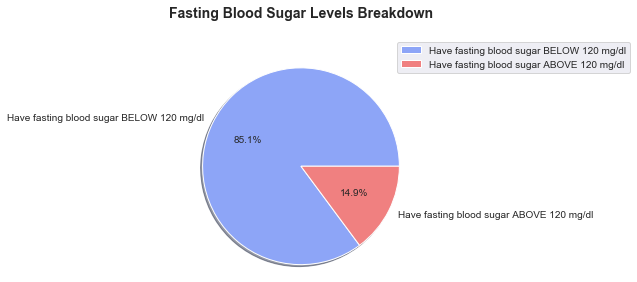

In [13]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
labels='Have fasting blood sugar BELOW 120 mg/dl','Have fasting blood sugar ABOVE 120 mg/dl'
sizes=list(df1['fbs'].value_counts())
colors=['#8da5f7','lightcoral']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Fasting Blood Sugar Levels Breakdown',y=1.0, pad=40,fontsize=14,fontweight='bold')
plt.legend(loc="right", bbox_to_anchor=(1.5, 1))
plt.show()

85.1% of the patients have fasting blood sugar below 120 mg/dl

14.9% of the patients have fasting blood sugar above 120 mg/dl

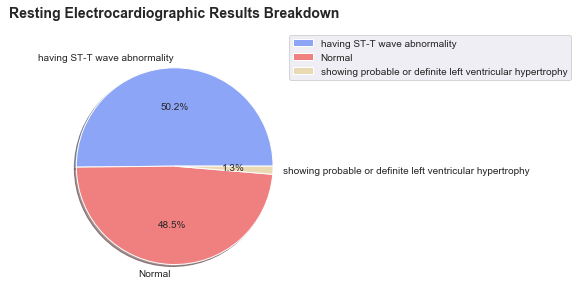

In [14]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
labels='having ST-T wave abnormality','Normal','showing probable or definite left ventricular hypertrophy'
sizes=list(df1['restecg'].value_counts())
colors=['#8da5f7','lightcoral', '#E9DAB4']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Resting Electrocardiographic Results Breakdown',y=1.0, pad=40,fontsize=14,fontweight='bold')
plt.legend(loc="right", bbox_to_anchor=(1.7, 1))
plt.show()

50.2% of the patients have ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

1.3% of the patients show probable or definite left ventricular hypertrophy by Estes' criteria

48.5 of the patients have normal Resting Electrocardiographic results

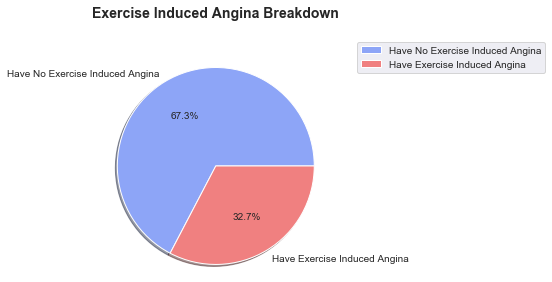

In [15]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
labels='Have No Exercise Induced Angina','Have Exercise Induced Angina'
sizes=list(df1['exng'].value_counts())
colors=['#8da5f7','lightcoral']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Exercise Induced Angina Breakdown',y=1.0, pad=40,fontsize=14,fontweight='bold')
plt.legend(loc="right", bbox_to_anchor=(1.5, 1))
plt.show()

67.3% of patients have no exercise induced angina

32.7% of patients have exercise induced angina

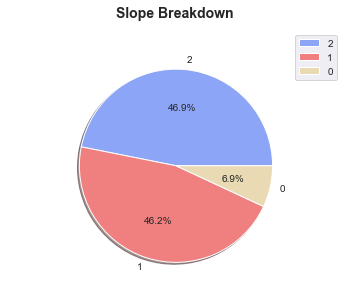

In [16]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
labels='2','1','0'
sizes=list(df1['slp'].value_counts())
colors=['#8da5f7','lightcoral', '#E9DAB4']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Slope Breakdown',y=1.0, pad=40,fontsize=14,fontweight='bold')
plt.legend(loc="right", bbox_to_anchor=(1, 1))
plt.show()

46.9% of the Patients have slope as 2

46.2% of the Patients have slope as 1

6.9% of the Patients have slope as 0

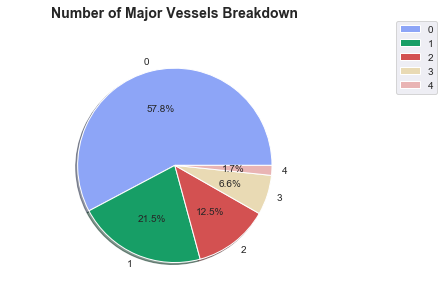

In [17]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
labels='0','1','2','3','4'
sizes=list(df1['caa'].value_counts())
colors=['#8da5f7','#179E66', '#D35151', '#E9DAB4', '#E9B4B4']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Number of Major Vessels Breakdown',y=1.0, pad=40,fontsize=14,fontweight='bold')
plt.legend(loc="right", bbox_to_anchor=(1.3, 1))
plt.show()

57.8% of the Patients have Slope 0

21.5% of the Patients have Slope 1

12.5% of the Patients have Slope 2

6.6% of the Patients have Slope 3

1.7% of the Patients have Slope 4

In [18]:
df1['thall'].value_counts()
'Thalium Stress Test result'

'Thalium Stress Test result'

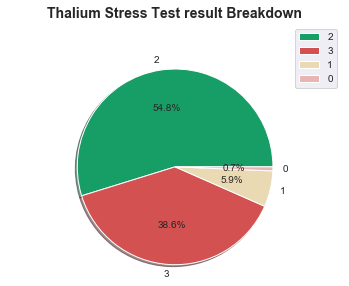

In [19]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
labels='2','3','1','0'
sizes=list(df1['thall'].value_counts())
colors=['#179E66', '#D35151', '#E9DAB4', '#E9B4B4']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Thalium Stress Test result Breakdown',y=1.0, pad=40,fontsize=14,fontweight='bold')
plt.legend(loc="right", bbox_to_anchor=(1, 1))
plt.show()

54.8% of the patients have Thalium Stress Test result as 2

38.6% of the patients have Thalium Stress Test result as 3

5.9% of the patients have Thalium Stress Test result as 1

0.7% of the patients have Thalium Stress Test result as 0

Text(0.5, 1.0, 'Distribution of Age')

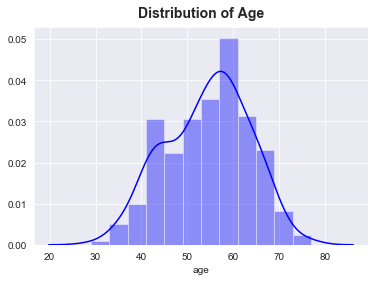

In [20]:
sns.distplot(df1['age'],color='b')
plt.title('Distribution of Age',y=1.0, pad=10,fontsize=14,fontweight='bold')

Maximum number a patients are 56-61 years of age

Text(0.5, 1.0, 'Boxplot of Age')

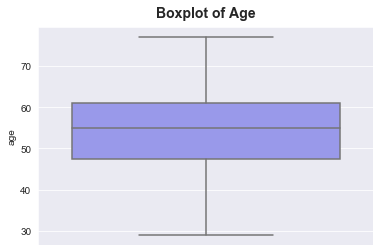

In [21]:
sns.boxplot(y='age',color='#8c8cf7',data=df1)
plt.title('Boxplot of Age',y=1.0, pad=10,fontsize=14,fontweight='bold')

No outliers present in Age

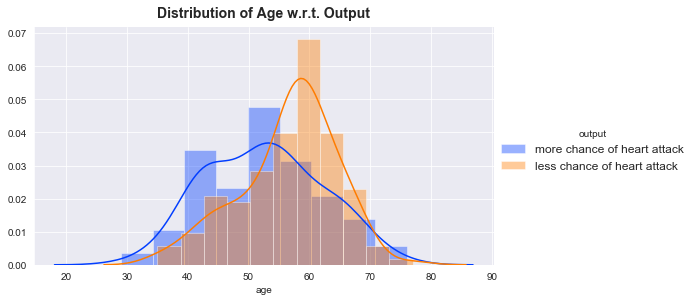

In [22]:
a=sns.FacetGrid(df1,palette='bright',hue='output',aspect=9/5,height=4)
a.map(sns.distplot,'age')
plt.title('Distribution of Age w.r.t. Output',y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Swarmplot between Age and Output')

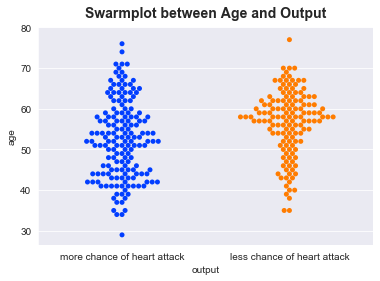

In [23]:
sns.swarmplot(y='age',x='output',data=df1,palette='bright')
plt.title('Swarmplot between Age and Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Patient between age 50-55 are more likely to have an heart attack

Patient between age 57-62 are less likely to have an heart attack

Text(0.5, 1.0, 'Distribution of Resting Blood Pressure (in mm Hg)')

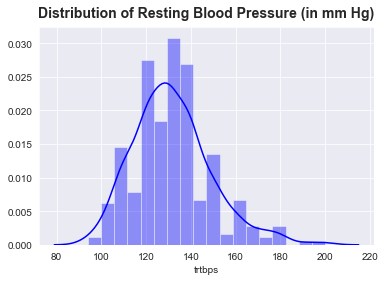

In [24]:
sns.distplot(df1['trtbps'],color='b')
plt.title('Distribution of Resting Blood Pressure (in mm Hg)',y=1.0, pad=10,fontsize=14,fontweight='bold')

Maximum number a patients have resting blood pressure between 119-140

Text(0.5, 1.0, 'Boxplot of Resting Blood Pressure (in mm Hg)')

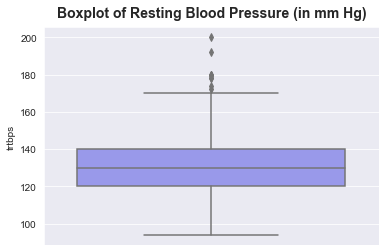

In [25]:
sns.boxplot(y='trtbps',color='#8c8cf7',data=df1)
plt.title('Boxplot of Resting Blood Pressure (in mm Hg)',y=1.0, pad=10,fontsize=14,fontweight='bold')

There are few outliers present in Resting Blood Pressure

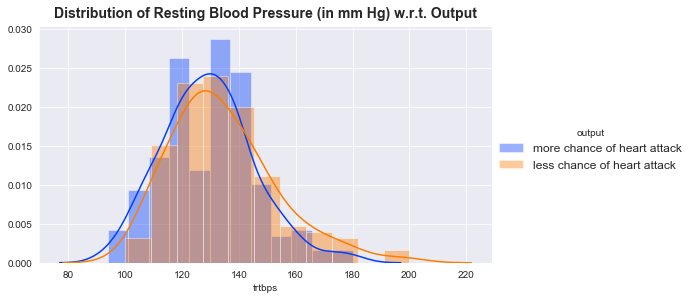

In [26]:
a=sns.FacetGrid(df1,palette='bright',hue='output',aspect=9/5,height=4)
a.map(sns.distplot,'trtbps')
plt.title('Distribution of Resting Blood Pressure (in mm Hg) w.r.t. Output',y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Resting Blood Pressure has no effect on the output since their distribution are overlapping

Text(0.5, 1.0, 'Boxplot between Resting Blood Pressure (in mm Hg), Output')

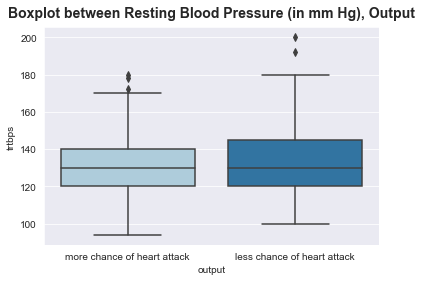

In [27]:
sns.boxplot(x='output',y='trtbps',data=df1)
plt.title('Boxplot between Resting Blood Pressure (in mm Hg), Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Swarmplot & Violinplot between Resting Blood Pressure (in mm Hg), Output')

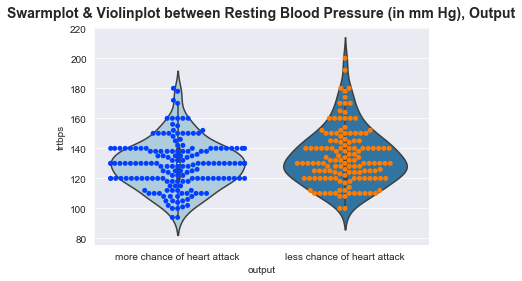

In [28]:
sns.violinplot(x='output',y='trtbps',data=df1)
sns.swarmplot(y='trtbps',x='output',data=df1,palette='bright')
plt.title('Swarmplot & Violinplot between Resting Blood Pressure (in mm Hg), Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Boxplot,Violinplot also suggests that resting blood pressure has no effect on the output 

Text(0.5, 1.0, 'Distribution of Cholestoral (in mg/dl) ')

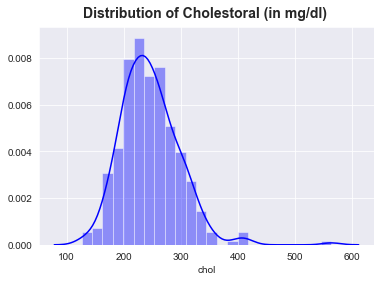

In [29]:
sns.distplot(df1['chol'],color='b')
plt.title('Distribution of Cholestoral (in mg/dl) ',y=1.0, pad=10,fontsize=14,fontweight='bold')

Maximum number of patients have Cholestol at 210-210

Text(0.5, 1.0, 'Boxplot of Resting Blood Pressure (in mm Hg)')

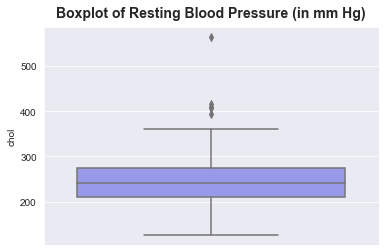

In [30]:
sns.boxplot(y='chol',color='#8c8cf7',data=df1)
plt.title('Boxplot of Resting Blood Pressure (in mm Hg)',y=1.0, pad=10,fontsize=14,fontweight='bold')

There are few outliers present in Resting Blood Pressure

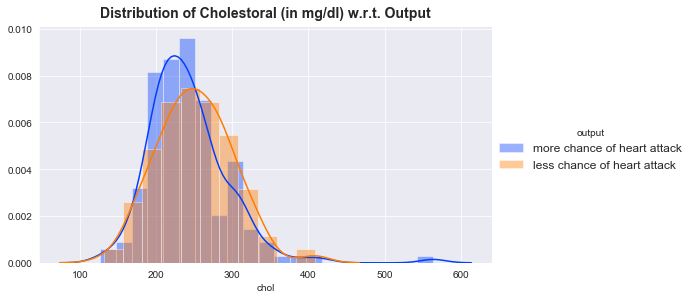

In [31]:
a=sns.FacetGrid(df1,palette='bright',hue='output',aspect=9/5,height=4)
a.map(sns.distplot,'chol')
plt.title('Distribution of Cholestoral (in mg/dl) w.r.t. Output',y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Cholestoral has no effect on the output since their distribution are overlapping

Text(0.5, 1.0, 'Boxplot between Cholestoral (in mg/dl) , Output')

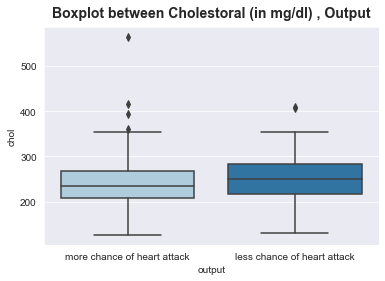

In [32]:
sns.boxplot(x='output',y='chol',data=df1)
plt.title('Boxplot between Cholestoral (in mg/dl) , Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Violinplot between Cholestoral (in mg/dl) , Output')

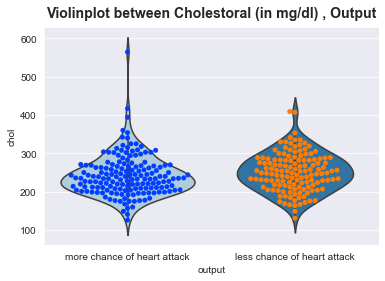

In [33]:
sns.violinplot(x='output',y='chol',data=df1)
sns.swarmplot(y='chol',x='output',data=df1,palette='bright')
plt.title('Violinplot between Cholestoral (in mg/dl) , Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Boxplot, Violinplot also suggests Cholestoral has no effect on Output

Text(0.5, 1.0, 'Distribution of Maximum heart rate achieved ')

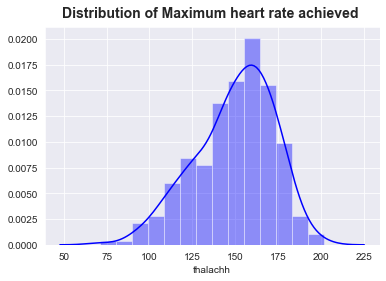

In [34]:
sns.distplot(df1['thalachh'],color='b')
plt.title('Distribution of Maximum heart rate achieved ',y=1.0, pad=10,fontsize=14,fontweight='bold')

Maximum number of patients have achieved Maximum heart rate around 151-160

Text(0.5, 1.0, 'Boxplot of Maximum heart rate achieved')

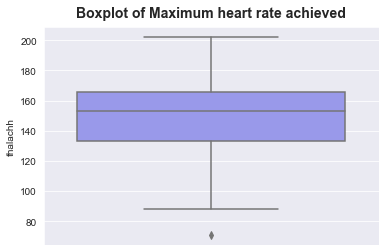

In [35]:
sns.boxplot(y='thalachh',color='#8c8cf7',data=df1)
plt.title('Boxplot of Maximum heart rate achieved',y=1.0, pad=10,fontsize=14,fontweight='bold')

One Outlier is present in Maximum heart rate achieved

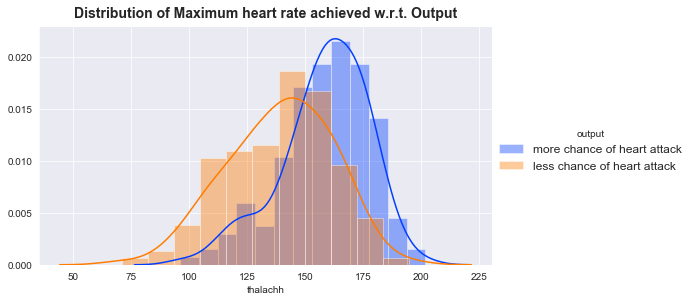

In [36]:
a=sns.FacetGrid(df1,palette='bright',hue='output',aspect=9/5,height=4)
a.map(sns.distplot,'thalachh')
plt.title('Distribution of Maximum heart rate achieved w.r.t. Output',y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

Text(0.5, 1.0, 'Swarmplot between Age and Output')

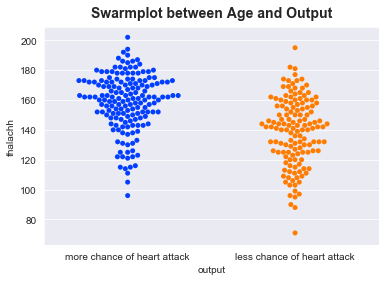

In [37]:
sns.swarmplot(y='thalachh',x='output',data=df1,palette='bright')
plt.title('Swarmplot between Age and Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Patients who have achived Maximum Heart Rate between 159-162 are most likely to have an heart attack

Patients who have achived Maximum Heart Rate between 140-145 are most likely to not have an heart attack

Text(0.5, 1.0, 'Distribution of Previous peak')

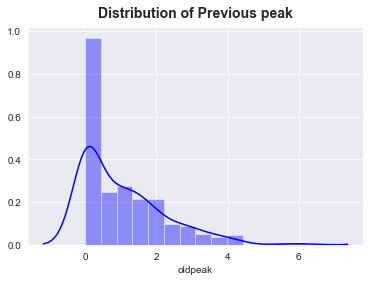

In [38]:
sns.distplot(df1['oldpeak'],color='b')
plt.title('Distribution of Previous peak',y=1.0, pad=10,fontsize=14,fontweight='bold')

Maximum number of Patients have Previous peak around 0-0.5

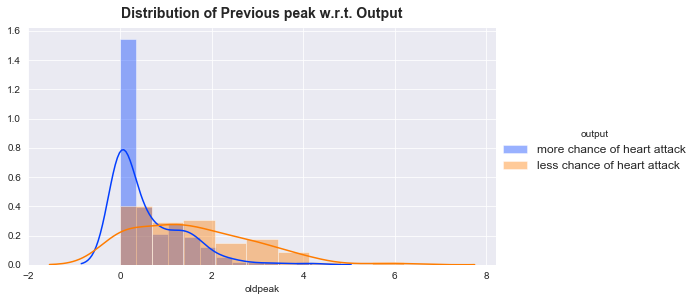

In [39]:
a=sns.FacetGrid(df1,palette='bright',hue='output',aspect=9/5,height=4)
a.map(sns.distplot,'oldpeak')
plt.title('Distribution of Previous peak w.r.t. Output',y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)

In [40]:
df1.groupby('output').oldpeak.describe()

count      mean       std  min  25%  50%  75%  \
output                                                                       
less chance of heart attack  138.0  1.585507  1.300340  0.0  0.6  1.4  2.5   
more chance of heart attack  165.0  0.583030  0.780683  0.0  0.0  0.2  1.0   

                             max  
output                            
less chance of heart attack  6.2  
more chance of heart attack  4.2

Text(0.5, 1.0, 'Swarmplot between Age and Output')

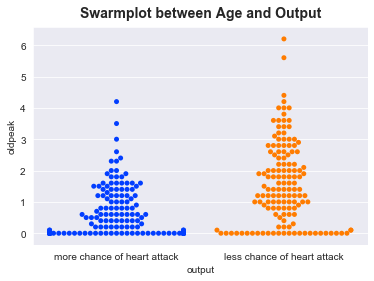

In [41]:
sns.swarmplot(y='oldpeak',x='output',data=df1,palette='bright')
plt.title('Swarmplot between Age and Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot between Previous Peak, Output')

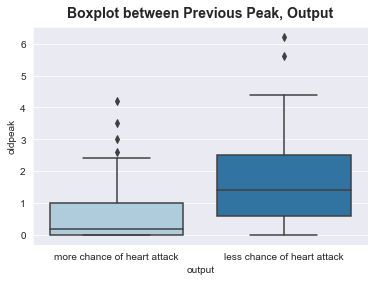

In [42]:
sns.boxplot(x='output',y='oldpeak',data=df1)
plt.title('Boxplot between Previous Peak, Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Patients having Previous Peak around 0-0.2 are most likely to have an heart attack

Patients having Previous Peak around 0.6-1 are most likely to not have an heart attack

Text(0.5, 1.0, 'Count plot between Chest Pain types and Output')

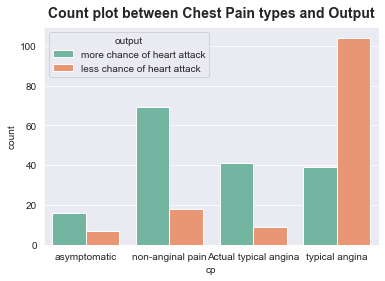

In [43]:
sns.countplot(x='cp',hue='output',data=df,palette='Set2')
plt.title('Count plot between Chest Pain types and Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Patients having non-anginal chest pain have most chances of having heart attack

Text(0.5, 1.0, 'Count plot between Fasting Blood Sugar Levels and Output')

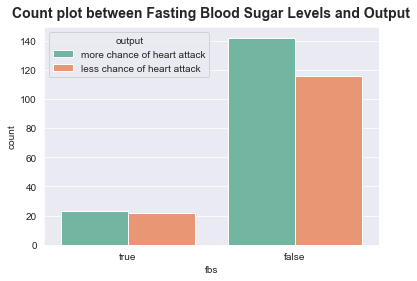

In [44]:
sns.countplot(x='fbs',hue='output',data=df,palette='Set2')
plt.title('Count plot between Fasting Blood Sugar Levels and Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Fasting blood sugar has no effect on the output since both in true case and false case the number patients are same

Text(0.5, 1.0, 'Count plot between Exercise induced angina and Output')

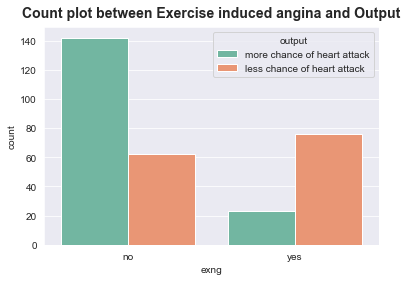

In [45]:
sns.countplot(x='exng',hue='output',data=df,palette='Set2')
plt.title('Count plot between Exercise induced angina and Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Patients having no Exercise Incduced Angina have most chances of having heart attack

Text(0.5, 1.0, 'Count plot between Slope and Output')

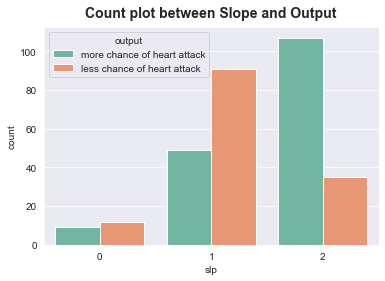

In [46]:
sns.countplot(x='slp',hue='output',data=df,palette='Set2')
plt.title('Count plot between Slope and Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Patients having Slope 2 have most chances of having heart attack

Text(0.5, 1.0, 'Count plot between Number of major vessels and Output')

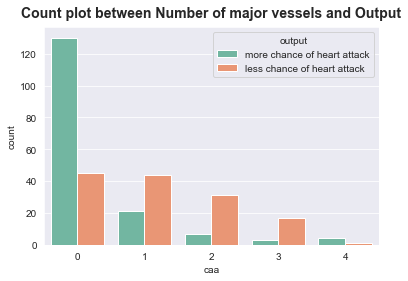

In [47]:
sns.countplot(x='caa',hue='output',data=df,palette='Set2')
plt.title('Count plot between Number of major vessels and Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Patients having Number of major vessels 0 have most chances of having heart attack

Text(0.5, 1.0, 'Count plot between Thalium Stress Test results and Output')

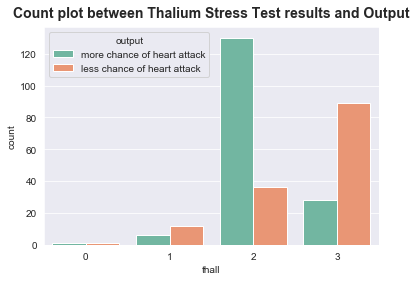

In [48]:
sns.countplot(x='thall',hue='output',data=df,palette='Set2')
plt.title('Count plot between Thalium Stress Test results and Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Patients having Thalium Stress Test results as 2 have most chances of having heart attack

Text(0.5, 1.0, 'Count plot between Gender and Output')

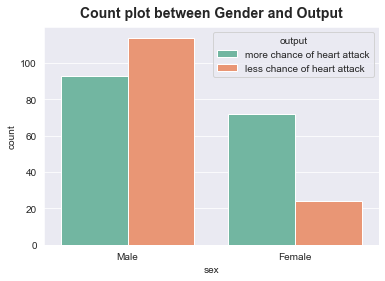

In [49]:
sns.countplot(x='sex',hue='output',data=df,palette='Set2')
plt.title('Count plot between Gender and Output',y=1.0, pad=10,fontsize=14,fontweight='bold')

Female Patients have more chances of heart attack

In [50]:
df_pair=df1.drop(['slp','caa','thall'],axis=1)
df_pair.head()

age     sex                     cp  trtbps  chol    fbs  \
0   63    Male           asymptomatic     145   233   true   
1   37    Male       non-anginal pain     130   250  false   
2   41  Female  Actual typical angina     130   204  false   
3   56    Male  Actual typical angina     120   236  false   
4   57  Female         typical angina     120   354  false   

                        restecg  thalachh exng  oldpeak  \
0                        normal       150   no      2.3   
1  having ST-T wave abnormality       187   no      3.5   
2                        normal       172   no      1.4   
3  having ST-T wave abnormality       178   no      0.8   
4  having ST-T wave abnormality       163  yes      0.6   

                        output  
0  more chance of heart attack  
1  more chance of heart attack  
2  more chance of heart attack  
3  more chance of heart attack  
4  more chance of heart attack

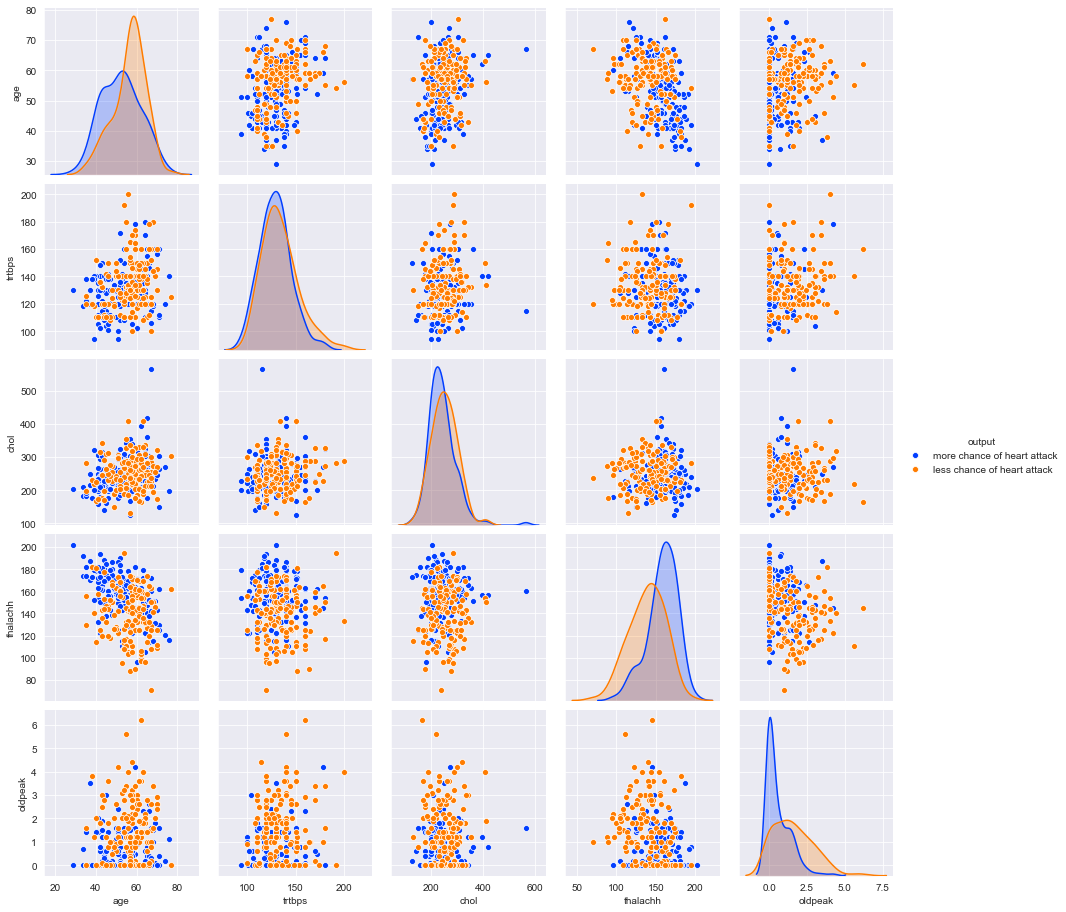

In [51]:
sns.pairplot(df_pair,hue='output',palette='bright')

In [52]:
df_pair.corr()

age    trtbps      chol  thalachh   oldpeak
age       1.000000  0.279351  0.213678 -0.398522  0.210013
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216
chol      0.213678  0.123174  1.000000 -0.009940  0.053952
thalachh -0.398522 -0.046698 -0.009940  1.000000 -0.344187
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000

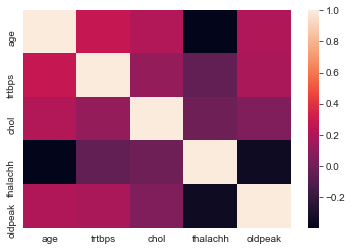

In [53]:
sns.heatmap(df_pair.corr())

There is no correlation between any of the continous variables

In [54]:
df_encoded = pd.read_csv('heart.csv')
df_encoded.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

#### Feature engineering

In [55]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

Text(0.5, 1.0, 'Boxplot of Age')

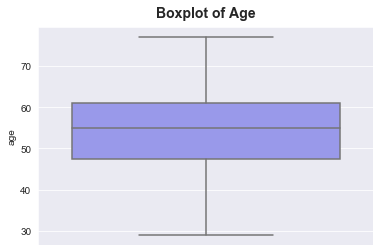

In [56]:
sns.boxplot(y='age',color='#8c8cf7',data=df_encoded)
plt.title('Boxplot of Age',y=1.0, pad=10,fontsize=14,fontweight='bold')

No Outliers

Text(0.5, 1.0, 'Boxplot of Resting Blood Pressure (in mm Hg) Before Removal of Outlier')

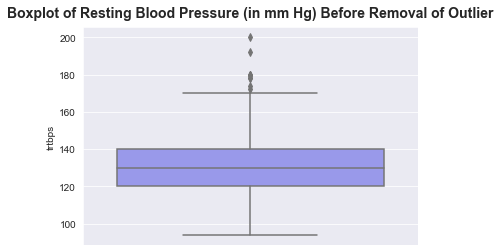

In [57]:
sns.boxplot(y='trtbps',color='#8c8cf7',data=df_encoded)
plt.title('Boxplot of Resting Blood Pressure (in mm Hg) Before Removal of Outlier',y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Resting Blood Pressure (in mm Hg) after removal of outliers')

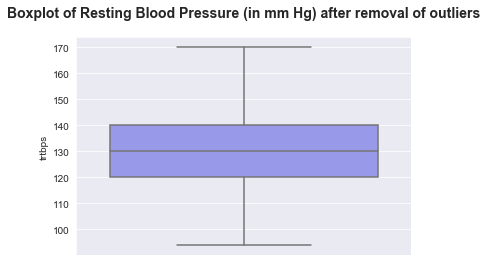

In [58]:
lower,upper=remove_outliers(df_encoded['trtbps'])
df_encoded['trtbps']=np.where(df_encoded['trtbps']>upper,upper,df_encoded['trtbps'])
df_encoded['trtbps']=np.where(df_encoded['trtbps']<lower,lower,df_encoded['trtbps'])
sns.boxplot(y='trtbps',color='#8c8cf7',data=df_encoded)
plt.title('Boxplot of Resting Blood Pressure (in mm Hg) after removal of outliers',y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Cholestoral (in mg/dl) Before Removal of Outlier')

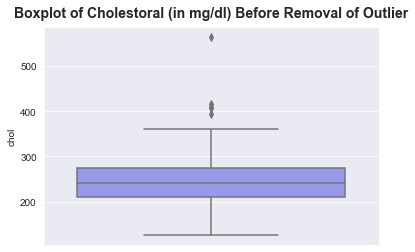

In [59]:
sns.boxplot(y='chol',color='#8c8cf7',data=df_encoded)
plt.title('Boxplot of Cholestoral (in mg/dl) Before Removal of Outlier',y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Cholestoral (in mg/dl) after removal of outliers')

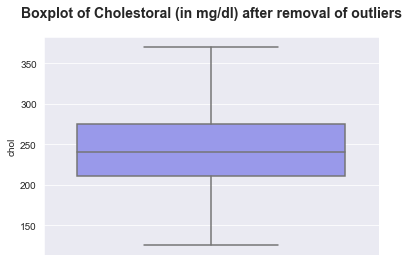

In [60]:
lower,upper=remove_outliers(df_encoded['chol'])
df_encoded['chol']=np.where(df_encoded['chol']>upper,upper,df_encoded['chol'])
df_encoded['chol']=np.where(df_encoded['chol']<lower,lower,df_encoded['chol'])
sns.boxplot(y='chol',color='#8c8cf7',data=df_encoded)
plt.title('Boxplot of Cholestoral (in mg/dl) after removal of outliers',y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Maximum heart rate achieved Before Removal of Outlier')

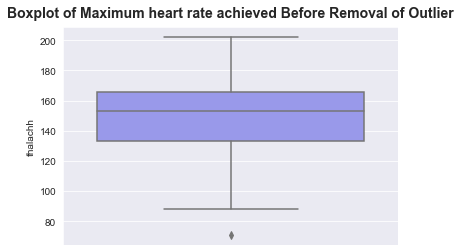

In [61]:
sns.boxplot(y='thalachh',color='#8c8cf7',data=df_encoded)
plt.title('Boxplot of Maximum heart rate achieved Before Removal of Outlier',y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Maximum heart rate achieved after removal of outliers')

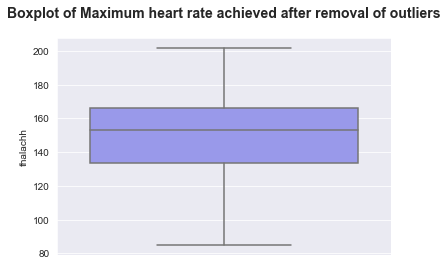

In [62]:
lower,upper=remove_outliers(df_encoded['thalachh'])
df_encoded['thalachh']=np.where(df_encoded['thalachh']>upper,upper,df_encoded['thalachh'])
df_encoded['thalachh']=np.where(df_encoded['thalachh']<lower,lower,df_encoded['thalachh'])
sns.boxplot(y='thalachh',color='#8c8cf7',data=df_encoded)
plt.title('Boxplot of Maximum heart rate achieved after removal of outliers',y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Oldpeak Before Removal of Outlier')

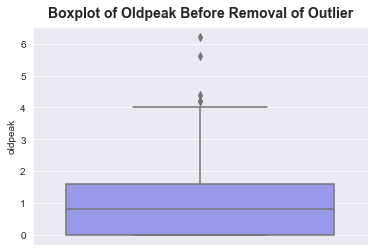

In [63]:
sns.boxplot(y='oldpeak',color='#8c8cf7',data=df_encoded)
plt.title('Boxplot of Oldpeak Before Removal of Outlier',y=1.0, pad=10,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Oldpeak after removal of outliers')

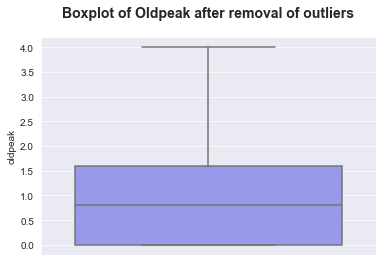

In [64]:
lower,upper=remove_outliers(df_encoded['oldpeak'])
df_encoded['oldpeak']=np.where(df_encoded['oldpeak']>upper,upper,df_encoded['oldpeak'])
df_encoded['oldpeak']=np.where(df_encoded['oldpeak']<lower,lower,df_encoded['oldpeak'])
sns.boxplot(y='oldpeak',color='#8c8cf7',data=df_encoded)
plt.title('Boxplot of Oldpeak after removal of outliers',y=1.0, pad=20,fontsize=14,fontweight='bold')

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_encoded.drop('output',axis=1))
df_scaler = pd.DataFrame(df_scaler, columns = df_encoded.drop('output',axis=1).columns)
df_scaler['output']=df_encoded['output']
df_scaler.head()

age       sex        cp    trtbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.828728 -0.255601  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.077351  0.102487 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.077351 -0.866457 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.681403 -0.192409 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.681403  2.293143 -0.417635  0.898962   

   thalachh      exng   oldpeak       slp       caa     thall  output  
0  0.013543 -0.696631  1.150938 -2.274579 -0.714429 -2.148873       1  
1  1.641748 -0.696631  2.233684 -2.274579 -0.714429 -0.512922       1  
2  0.981665 -0.696631  0.338879  0.976352 -0.714429 -0.512922       1  
3  1.245698 -0.696631 -0.202494  0.976352 -0.714429 -0.512922       1  
4  0.585615  1.435481 -0.382951  0.976352 -0.714429 -0.512922       1

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df_encoded)
df_scaler = pd.DataFrame(df_scaler, columns = df_encoded.columns)
df_scaler.head()


age  sex        cp    trtbps      chol  fbs  restecg  thalachh  exng  \
0  0.708333  1.0  1.000000  0.671053  0.438974  1.0      0.0  0.556503   0.0   
1  0.166667  1.0  0.666667  0.473684  0.508718  0.0      0.5  0.872068   0.0   
2  0.250000  0.0  0.333333  0.473684  0.320000  0.0      0.0  0.744136   0.0   
3  0.562500  1.0  0.333333  0.342105  0.451282  0.0      0.5  0.795309   0.0   
4  0.583333  0.0  0.000000  0.342105  0.935385  0.0      0.5  0.667377   1.0   

   oldpeak  slp  caa     thall  output  
0    0.575  0.0  0.0  0.333333     1.0  
1    0.875  0.0  0.0  0.666667     1.0  
2    0.350  1.0  0.0  0.666667     1.0  
3    0.200  1.0  0.0  0.666667     1.0  
4    0.150  1.0  0.0  0.666667     1.0

In [67]:
from sklearn.model_selection import train_test_split
X=df_scaler.drop('output',axis=1)
y=df_scaler['output']
# Test Set Not to be used till final model selection
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Filter Method


In [68]:
from sklearn.model_selection import train_test_split
X=X_train
y=y_train
# Test Set Not to be used till final model selection
X_train_filter, X_test_filter, y_train_filter, y_test_filter = train_test_split(X,y,test_size=0.3,random_state=42)

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
T
from sklearn.linear_model import LogisticRegression

column_names = df_encoded.drop(columns = ['output']).columns

no_of_features = []
r_squared_test = []

for k in range(3, 14):
    selector = SelectKBest(score_func=mutual_info_classif, k = k)
    X_train_transformed_filter = selector.fit_transform(X_train_filter, y_train_filter)
    X_test_transformed_filter = selector.transform(X_test_filter)
    regressor = LogisticRegression(random_state=42)
    regressor.fit(X_train_transformed_filter, y_train_filter)
    no_of_features.append(k)
    r_squared_test.append(regressor.score(X_test_transformed_filter, y_test_filter))
    


px.line(x=no_of_features,y=r_squared_test)

10 features to be selected

In [70]:
selector = SelectKBest(score_func=mutual_info_classif, k = 10)
X_train_transformed_filter = selector.fit_transform(X_train_filter, y_train_filter)
X_test_transformed_filter = selector.transform(X_test_filter)
column_names[selector.get_support()]

Index(['sex', 'cp', 'trtbps', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp',
       'caa', 'thall'],
      dtype='object')

Features Selected are 'sex', 'cp', 'trtbps', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp',
       'caa', 'thall'

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [72]:
def class_model(model):
    clf = model
    clf.fit(X_train_transformed_filter, y_train_filter)
    score = clf.score(X_test_transformed_filter, y_test_filter)
    return regressor, score

In [73]:
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    regressor, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

model_performance

C:\Users\aryan\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:33:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model     Score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.808219
1  KNeighborsClassifier(algorithm='auto', leaf_si...  0.780822
2  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.753425
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.671233
4  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.794521
5  ([DecisionTreeRegressor(ccp_alpha=0.0, criteri...  0.780822
6  LGBMClassifier(boosting_type='gbdt', class_wei...  0.808219
7  XGBClassifier(base_score=0.5, booster='gbtree'...  0.780822

## Wrapper Method

In [74]:
from sklearn.feature_selection import RFE

no_of_features = []
accuracy_test = []

for k in range(3, 14):
    clf = LogisticRegression(random_state=42)
    rfe=RFE(clf,k)
    X_train_transformed_filter = rfe.fit_transform(X_train_filter, y_train_filter)
    X_test_transformed_filter = rfe.transform(X_test_filter)
    clf.fit(X_train_transformed_filter, y_train_filter)
    no_of_features.append(k)
    accuracy_test.append(clf.score(X_test_transformed_filter, y_test_filter))
    


px.line(x=no_of_features,y=accuracy_test)

8 features to be selected

In [75]:
column_names = df_encoded.drop(columns = ['output']).columns
clf=LogisticRegression(random_state=42)
rfe=RFE(clf,8)
X_train_transformed_filter = rfe.fit_transform(X_train_filter, y_train_filter)
X_test_transformed_filter = rfe.transform(X_test_filter)
clf.fit(X_train_transformed_filter, y_train_filter)
column_names[rfe.get_support()]

Index(['sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'], dtype='object')

Features selected 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'

In [76]:
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    regressor, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

model_performance

[18:33:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aryan\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Model     Score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.794521
1  KNeighborsClassifier(algorithm='auto', leaf_si...  0.808219
2  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.753425
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.739726
4  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.808219
5  ([DecisionTreeRegressor(ccp_alpha=0.0, criteri...  0.794521
6  LGBMClassifier(boosting_type='gbdt', class_wei...  0.794521
7  XGBClassifier(base_score=0.5, booster='gbtree'...  0.794521

In [77]:

column_names = df_encoded.drop(columns = ['output']).columns
lasso=LogisticRegression(C=1,penalty='l1',solver='liblinear',random_state=42)
lasso_coef=lasso.fit(X_train_filter,y_train_filter).coef_

px.line(
    x=column_names,
    y=lasso_coef[0])

In [78]:
column_names[lasso_coef[0]!=0]

Index(['sex', 'cp', 'chol', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp',
       'caa', 'thall'],
      dtype='object')

Features selected 'sex', 'cp', 'chol', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp',
       'caa', 'thall'

In [79]:
drop_features=column_names[lasso_coef[0]==0]
X_train_transformed_filter=X_train_filter.drop(drop_features,axis=1)
X_test_transformed_filter=X_test_filter.drop(drop_features,axis=1)

In [80]:
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),KNeighborsClassifier(),SVC(random_state=42),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    regressor, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

model_performance

C:\Users\aryan\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:33:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model     Score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.794521
1  KNeighborsClassifier(algorithm='auto', leaf_si...  0.780822
2  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.753425
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.726027
4  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.780822
5  ([DecisionTreeRegressor(ccp_alpha=0.0, criteri...  0.767123
6  LGBMClassifier(boosting_type='gbdt', class_wei...  0.794521
7  XGBClassifier(base_score=0.5, booster='gbtree'...  0.767123

Features selected from RFE Method is taken and K-NN Classifier is the model since it has the highest score

In [81]:
column_names = df_encoded.drop(columns = ['output']).columns
clf=LogisticRegression(random_state=42)
rfe=RFE(clf,8)
X_train_transformed_filter = rfe.fit_transform(X_train_filter, y_train_filter)
X_test_transformed_filter = rfe.transform(X_test_filter)
clf.fit(X_train_transformed_filter, y_train_filter)
column_names[rfe.get_support()]

Index(['sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'], dtype='object')

In [82]:
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LogisticRegression(random_state=42),SVC(random_state=42),KNeighborsClassifier(),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

for model in models_to_evaluate:
    regressor, score = class_model(model)
    model_performance = model_performance.append({"Model": model, "Score": score}, ignore_index=True)

model_performance

C:\Users\aryan\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:33:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model     Score
0  LogisticRegression(C=1.0, class_weight=None, d...  0.794521
1  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.753425
2  KNeighborsClassifier(algorithm='auto', leaf_si...  0.808219
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.739726
4  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...  0.808219
5  ([DecisionTreeRegressor(ccp_alpha=0.0, criteri...  0.794521
6  LGBMClassifier(boosting_type='gbdt', class_wei...  0.794521
7  XGBClassifier(base_score=0.5, booster='gbtree'...  0.794521

In [83]:
X_train=X_train[column_names[selector.get_support()]]
X_test=X_test[column_names[selector.get_support()]]
X_train.head()


sex        cp    trtbps  restecg  thalachh  exng  oldpeak  slp  caa  \
132  1.0  0.333333  0.342105      0.5  0.658849   0.0     0.00  1.0  0.0   
202  1.0  0.000000  0.736842      0.0  0.223881   1.0     0.20  1.0  0.0   
196  1.0  0.666667  0.736842      0.5  0.530917   0.0     0.90  0.5  0.0   
75   0.0  0.333333  0.539474      0.0  0.650320   0.0     0.35  0.5  0.0   
176  1.0  0.000000  0.302632      0.5  0.641791   1.0     0.35  1.0  0.5   

        thall  
132  0.666667  
202  1.000000  
196  0.666667  
75   0.666667  
176  1.000000

## Hyper Parameter Tuning

In [84]:
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print(score)

0.8360655737704918


In [85]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 24


In [87]:
clf=KNeighborsClassifier(n_neighbors=24,leaf_size=1,p=1)
clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print(score)

0.8688524590163934


In [88]:
clf.score(X_train,y_train)

0.8181818181818182

In [97]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[25,  4],
       [ 4, 28]], dtype=int64)

Text(0.5, 16.0, 'Predicted label')

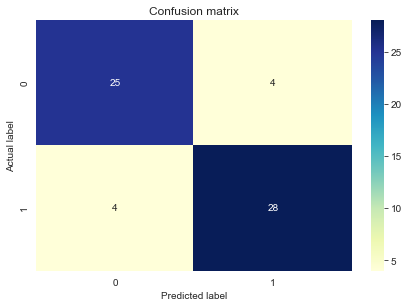

In [93]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [95]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
